## Some Basic EDA on Extracted Data from Resumes

In [2]:
import numpy as np
import pandas as pd

import re
import string 
import contractions 
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm
tqdm.pandas(desc="Progress Bar")

import warnings
warnings.filterwarnings("ignore")

In [3]:
resume_df = pd.read_csv('data/extracted_resume.csv')
resume_df.head()

,Skills,Education,ID,Category
0,Excellent classroom managementÂ,Subject Matter Authorization in Science: Scien...,37201447,AGRICULTURE
1,"Team mediation, Budget Management, Delegation ...","2009 Howard University ï¼​ City , State , USA ...",12674256,AGRICULTURE
2,"COMPUTER LITERACY, E-mail, English, government...","2011\nThe Universty of Zambia ï¼​ City , State...",29968330,AGRICULTURE
3,"C, C++, communication skills, designing, ELISA...","Masters of Science , Biotechnology 5 2013 Univ...",81042872,AGRICULTURE
4,"Data Entry, Printers, Clients, Loans, Tax Retu...",Wayne State University 2013 MBA : Linguistics ...,20006992,AGRICULTURE


In [4]:
resume_df.shape

(2484, 4)

### Checking Null Values

In [5]:
resume_df.isna().sum()

Skills        91
Education    590
ID             0
Category       0
dtype: int64

Looks like Education was not extracted properly 

In [6]:
print(resume_df[(resume_df.Skills.isna() & resume_df.Education.isna())])

     Skills Education        ID                Category
141     NaN       NaN  14248724                    ARTS
261     NaN       NaN  16280971                   SALES
658     NaN       NaN  15499825              HEALTHCARE
1201    NaN       NaN  29051656  INFORMATION-TECHNOLOGY
1298    NaN       NaN  20237244  INFORMATION-TECHNOLOGY
1525    NaN       NaN  14849103            CONSTRUCTION
1554    NaN       NaN  14014749                DESIGNER
1607    NaN       NaN  90066849                DESIGNER
1758    NaN       NaN  17576030                 FITNESS
1760    NaN       NaN  21178545                 FITNESS
1828    NaN       NaN  77266989                 FITNESS
1934    NaN       NaN  12632728    BUSINESS-DEVELOPMENT
2082    NaN       NaN  31225895                 APPAREL
2183    NaN       NaN  17021141                ADVOCATE
2388    NaN       NaN  20566550             ENGINEERING


In [7]:
print(resume_df[~(resume_df['Skills'].isna() & resume_df['Education'].isna())].shape)

(2469, 4)


Removing PDFs with both Skills and Education as NA

In [8]:
df = resume_df[~(resume_df['Skills'].isna() & resume_df['Education'].isna())].reset_index(drop=True)

In [9]:
df.head()

,Skills,Education,ID,Category
0,Excellent classroom managementÂ,Subject Matter Authorization in Science: Scien...,37201447,AGRICULTURE
1,"Team mediation, Budget Management, Delegation ...","2009 Howard University ï¼​ City , State , USA ...",12674256,AGRICULTURE
2,"COMPUTER LITERACY, E-mail, English, government...","2011\nThe Universty of Zambia ï¼​ City , State...",29968330,AGRICULTURE
3,"C, C++, communication skills, designing, ELISA...","Masters of Science , Biotechnology 5 2013 Univ...",81042872,AGRICULTURE
4,"Data Entry, Printers, Clients, Loans, Tax Retu...",Wayne State University 2013 MBA : Linguistics ...,20006992,AGRICULTURE


In [10]:
df.isna().sum()

Skills        76
Education    575
ID             0
Category       0
dtype: int64

In [11]:
df[df.Skills.isna()]

,Skills,Education,ID,Category
34,NaN,Bachelor of Arts : Criminal Justice California...,27689009,AGRICULTURE
51,NaN,"Ph.D : Soil, Water and Environmental Science 2...",24001783,AGRICULTURE
61,NaN,"Master : Accounting (GPA 3.7) , 2009 McCombs S...",56068028,AGRICULTURE
69,NaN,2014\nBachelor of Science : Recording Arts Ful...,66226673,ARTS
80,NaN,"Association Youth Art Month Exhibition, Young ...",11555549,ARTS
...,...,...,...,...
2331,NaN,Bachelor of Science : Electrical and Computer ...,12748557,ENGINEERING
2346,NaN,"Ph. D : Mechanical Engineering , April, 2015 U...",35172961,ENGINEERING
2362,NaN,Graduate Certificate : Project Management 2010...,28631840,ENGINEERING
2371,NaN,Master of Science : Mechanical Engineering Dec...,77828437,ENGINEERING


In [12]:
df[df.Education.isna()]

,Skills,Education,ID,Category
12,Time Management,NaN,28165687,AGRICULTURE
16,"Deep expertise in designing,developing,\nimple...",NaN,11813872,AGRICULTURE
22,"Customer service, art, clerical, doors, specia...",NaN,79536879,AGRICULTURE
29,Production and Processing Â Basic computer skills,NaN,16849128,AGRICULTURE
31,Strong interpersonal skills,NaN,38216888,AGRICULTURE
...,...,...,...,...
2458,"vehicle repairs, database, inventory, marketin...",NaN,16332293,AUTOMOBILE
2460,Professional and friendly.Careful and active l...,NaN,23522150,AUTOMOBILE
2464,Claims file management processes,NaN,11257723,AUTOMOBILE
2465,Quality control Solid communication skills,NaN,11797122,AUTOMOBILE


### Distribution

In [13]:
df.Category.value_counts()

Category
BUSINESS-DEVELOPMENT      119
ACCOUNTANT                118
FINANCE                   118
CHEF                      118
INFORMATION-TECHNOLOGY    118
AVIATION                  117
ADVOCATE                  117
ENGINEERING               117
BANKING                   115
CONSULTANT                115
SALES                     115
HEALTHCARE                114
FITNESS                   114
PUBLIC-RELATIONS          111
CONSTRUCTION              111
HR                        110
DESIGNER                  105
TEACHER                   102
ARTS                      102
DIGITAL-MEDIA              96
APPAREL                    96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64

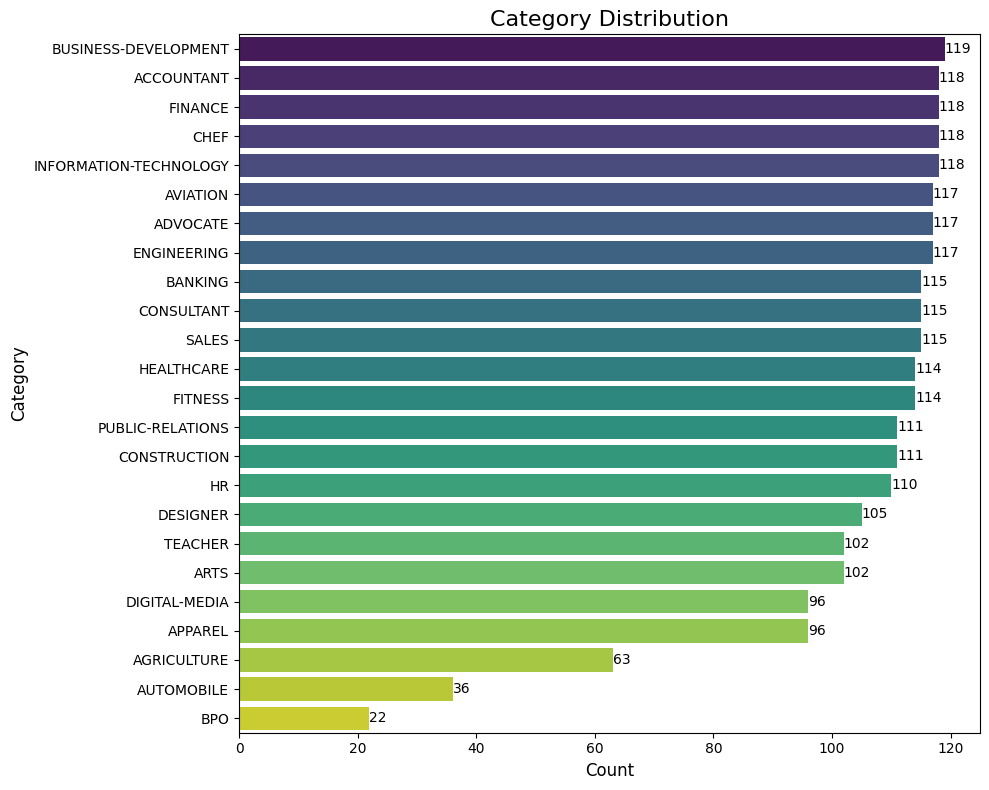

In [14]:
plt.figure(figsize=(10, 8))

category_counts = df['Category'].value_counts()
sns.barplot(y=category_counts.index, x=category_counts.values, palette='viridis')

# Annotate the bars with actual values
for index, value in enumerate(category_counts.values):
    plt.text(value, index, str(value), va='center', ha='left', fontsize=10)

plt.title('Category Distribution', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.tight_layout()
plt.show()

### EDA on text data

Let's do some basic text cleaning & see some text statistics

In [15]:
def text_cleaning(text:str) -> str:
    """
    Function to clean the text data
    Args:
        text (str): Text to be cleaned
    Returns:
        str: Cleaned text
    """
    
    if pd.isnull(text):
        return
    
    # lower-case everything
    text = text.lower().strip()
    
    # For removing puctuations
    translator = str.maketrans('', '', string.punctuation)
    
    # expand all the short-form words
    text = contractions.fix(text)
    
    # remove any special chars
    text = re.sub(r'http\S+|www\S+|https\S+', '', text) # Remove URLs
    text = re.sub(r'\S+@\S+', '', text) # Remove emails
    text = re.sub(r'\b\d{1,3}[-./]?\d{1,3}[-./]?\d{1,4}\b', '', text) # Remove phone numbers
    text = text.translate(translator) # Remove puctuations
    text = re.sub(r'[^a-zA-Z]', ' ', text) # Remove other non-alphanumeric characters
    
    return text.strip()

In [16]:
# Let's stitch together Skills & Education, similar to given in job description.
resume_df = df.copy()

# Filling the null values in Skills & Education with Empty String before concatinating them
resume_df = resume_df.fillna(value='')

resume_df['CV'] = resume_df['Skills'] + ' ' + resume_df['Education']
resume_df['CV'] = resume_df['CV'].progress_apply(text_cleaning)

Progress Bar: 100%|██████████| 2469/2469 [00:00<00:00, 16902.96it/s]


In [17]:
resume_df.head()

,Skills,Education,ID,Category,CV
0,Excellent classroom managementÂ,Subject Matter Authorization in Science: Scien...,37201447,AGRICULTURE,excellent classroom management subject matter...
1,"Team mediation, Budget Management, Delegation ...","2009 Howard University ï¼​ City , State , USA ...",12674256,AGRICULTURE,team mediation budget management delegation ex...
2,"COMPUTER LITERACY, E-mail, English, government...","2011\nThe Universty of Zambia ï¼​ City , State...",29968330,AGRICULTURE,computer literacy email english government dir...
3,"C, C++, communication skills, designing, ELISA...","Masters of Science , Biotechnology 5 2013 Univ...",81042872,AGRICULTURE,c c communication skills designing elisa glp g...
4,"Data Entry, Printers, Clients, Loans, Tax Retu...",Wayne State University 2013 MBA : Linguistics ...,20006992,AGRICULTURE,data entry printers clients loans tax returns ...


### Analyzing Mean Word length(and Percentile wise) in CVs by their Category

In [18]:
# Here (x-percentile = y) means that, that x% of words have 
# in the whole corpus have length less than or equal to y in the corpus of text we have

# for category in resume_df.Category.unique():
#     category_wise_cv = resume_df[resume_df.Category==category]['CV']
#     print(f"{category}")
#     print(category_wise_cv.str.split().str.len().describe(percentiles=[0.05,0.5,0.8,0.9,0.95]), end='\n\n')

# SAME THING IS DONE BELOW, FOR BETTER visualization

In [19]:
category_stats = []

for category in resume_df['Category'].unique():
    category_wise_cv = resume_df[resume_df['Category'] == category]['CV']
    stats = category_wise_cv.str.split().str.len().describe(percentiles=[0.05, 0.5, 0.8, 0.9, 0.95])
    category_stats.append({'Category': category, **stats.to_dict()})

stats_df = pd.DataFrame(category_stats)

# Display the resulting DataFrame
stats_df

,Category,count,mean,std,min,5%,50%,80%,90%,95%,max
0,AGRICULTURE,63.0,95.619048,160.796649,2.0,6.20,51.0,110.0,153.2,297.80,985.0
1,ARTS,102.0,101.333333,164.892424,1.0,5.05,50.5,106.6,156.6,482.75,893.0
2,SALES,115.0,62.991304,125.206951,1.0,2.00,37.0,69.0,96.2,181.30,1062.0
3,CONSULTANT,115.0,66.269565,105.850965,1.0,2.00,42.0,96.4,124.0,169.60,867.0
4,DIGITAL-MEDIA,96.0,46.812500,43.288339,2.0,4.75,37.5,68.0,90.0,119.25,303.0
5,CHEF,118.0,87.000000,170.605358,1.0,5.85,45.0,84.0,157.8,255.80,1417.0
6,HEALTHCARE,114.0,85.298246,164.006471,1.0,3.00,39.5,80.8,113.7,498.45,905.0
7,PUBLIC-RELATIONS,111.0,81.873874,115.654982,1.0,8.50,48.0,94.0,147.0,297.50,745.0
8,AVIATION,117.0,71.871795,112.382777,2.0,3.00,41.0,86.6,147.8,269.80,879.0
9,BANKING,115.0,77.539130,159.677377,3.0,7.00,46.0,79.2,105.6,222.00,1487.0


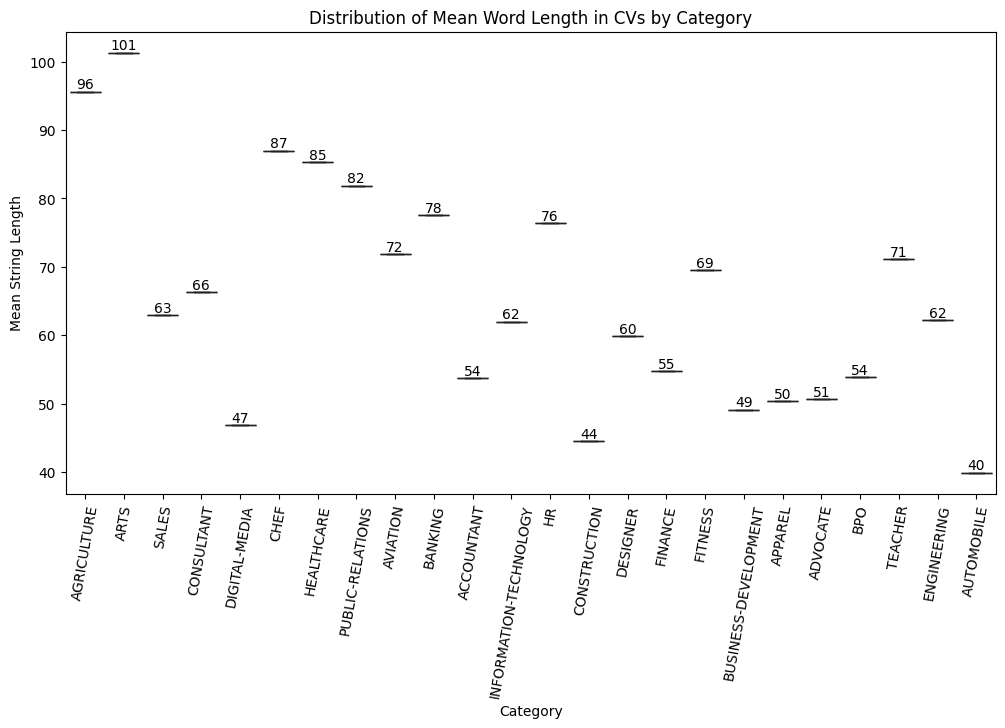

In [20]:
# Create a box plot to visualize the distribution of string lengths for each category
plt.figure(figsize=(12, 6))
sns.boxplot(data=stats_df, x='Category', y='mean', palette='viridis')

# Annotate the bars with actual values
for index, row in stats_df.iterrows():
    plt.text(index, row['mean'], f'{round(row["mean"])}', ha='center', va='bottom', fontsize=10)

plt.title('Distribution of Mean Word Length in CVs by Category')
plt.xticks(rotation=80)
plt.xlabel('Category')
plt.ylabel('Mean String Length')
plt.show();

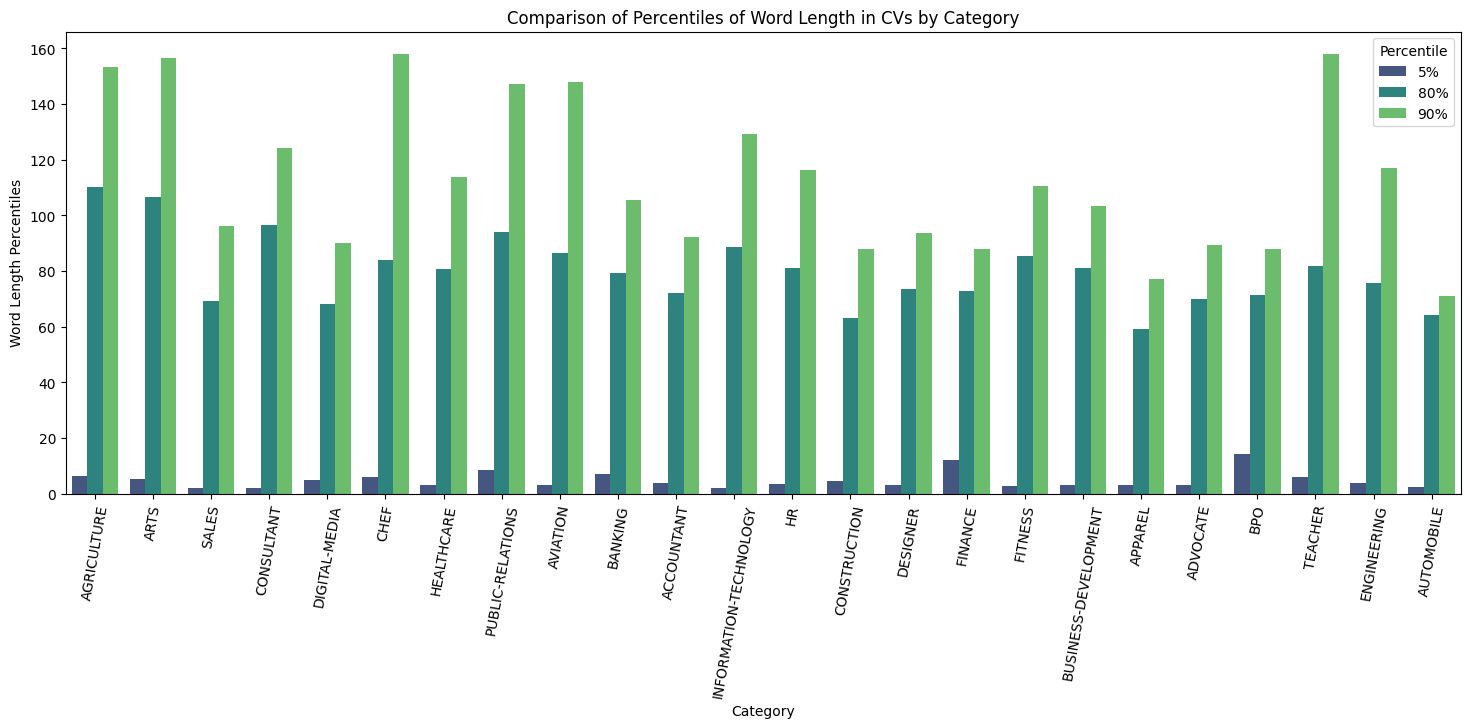

In [21]:
# Reshape the DataFrame to long format for easier plotting
stats_df_long = pd.melt(stats_df, id_vars=['Category'], value_vars=['5%', '80%', '90%'])

# Create a bar plot to compare percentiles of word length for each category
plt.figure(figsize=(18, 6))
sns.barplot(data=stats_df_long, x='Category', y='value', hue='variable', palette='viridis')

plt.title('Comparison of Percentiles of Word Length in CVs by Category')
plt.xticks(rotation=80)
plt.xlabel('Category')
plt.ylabel('Word Length Percentiles')
plt.legend(title='Percentile')
plt.show();

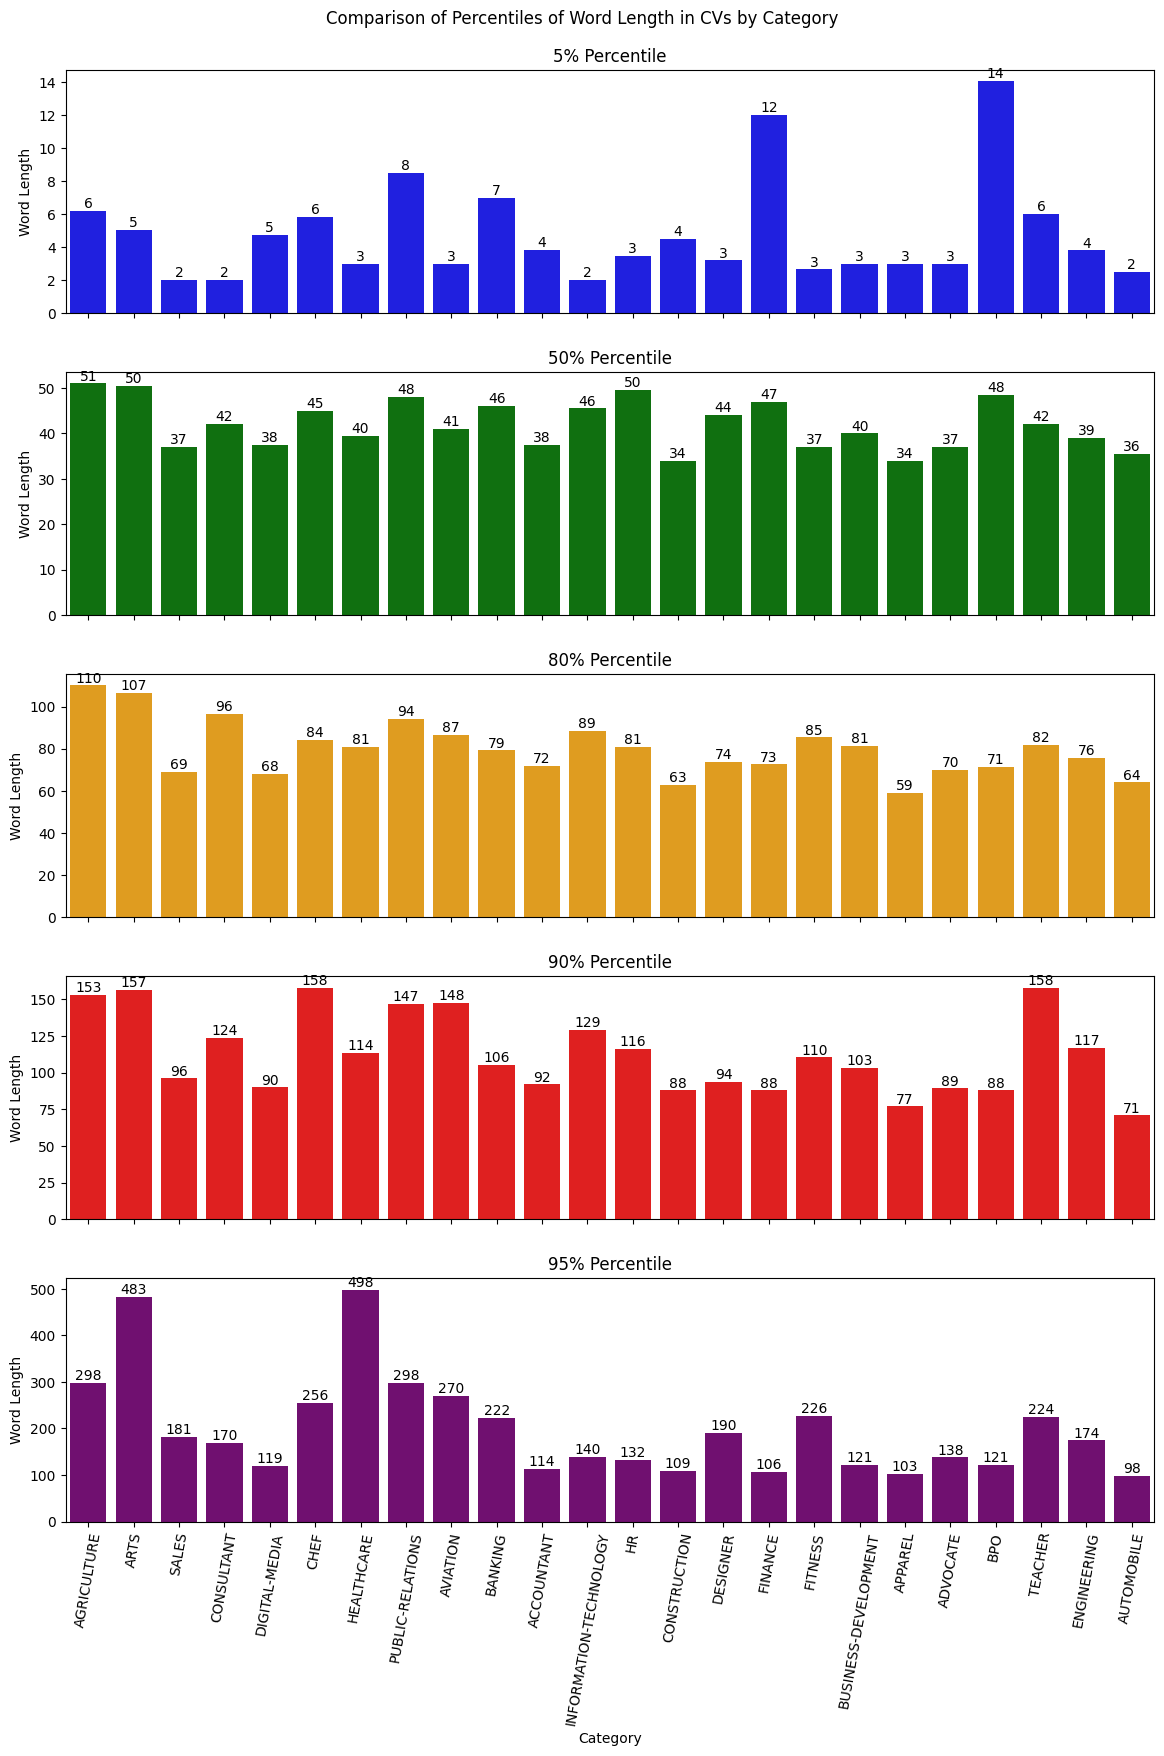

In [22]:
# Create a 5x1 subplot
fig, axes = plt.subplots(5, 1, figsize=(12, 18), sharex=True)

percentiles = ['5%', '50%', '80%', '90%', '95%']
colors = ['blue', 'green', 'orange', 'red', 'purple']

for i, percentile in enumerate(percentiles):
    # Create a bar plot for each percentile
    sns.barplot(data=stats_df, x='Category', y=percentile, color=colors[i], ax=axes[i])
    
    # Annotate the bars with actual values
    for index, row in stats_df.iterrows():
        value = row[percentile]
        axes[i].text(index, value, f'{round(value)}', ha='center', va='bottom', fontsize=10)

    axes[i].set_title(f'{percentile} Percentile')
    axes[i].set_ylabel('Word Length')

# Set the common x-axis label and rotate x-axis ticks
plt.xlabel('Category')
plt.xticks(rotation=80)
plt.suptitle('Comparison of Percentiles of Word Length in CVs by Category')

# Adjust spacing between subplots
plt.tight_layout(pad=2.0)

# Show the plots
plt.show();

## Same EDA on JD Data

In [23]:
from datasets import load_dataset

jd_data = load_dataset('jacob-hugging-face/job-descriptions', split="train")
jd_df = pd.DataFrame(jd_data)
jd_df.head()

Generating train split: 100%|██████████| 853/853 [00:00<00:00, 14345.57 examples/s]


,company_name,job_description,position_title,description_length,model_response
0,Google,minimum qualifications\nbachelors degree or eq...,Sales Specialist,2727,"{\n ""Core Responsibilities"": ""Responsible fo..."
1,Apple,description\nas an asc you will be highly infl...,Apple Solutions Consultant,828,"{\n ""Core Responsibilities"": ""as an asc you ..."
2,Netflix,its an amazing time to be joining netflix as w...,Licensing Coordinator - Consumer Products,3205,"{\n ""Core Responsibilities"": ""Help drive bus..."
3,Robert Half,description\n\nweb designers looking to expand...,Web Designer,2489,"{\n ""Core Responsibilities"": ""Designing webs..."
4,TrackFive,at trackfive weve got big goals were on a miss...,Web Developer,3167,"{\n ""Core Responsibilities"": ""Build and layo..."


In [24]:
jd_df['job_description'] = jd_df['job_description'].progress_apply(text_cleaning)

Progress Bar: 100%|██████████| 853/853 [00:00<00:00, 3517.76it/s]


In [25]:
# A lot of position_title are present
jd_df.position_title.unique()

len(jd_df.position_title.unique())

725

In [26]:
# A lot of companies
jd_df.company_name.unique()

len(jd_df.company_name.unique())

853

### Comapring the word lengths in JDs and CVs

Though keep in mind, that number of JDs(=853) are less compared to CVs(=2469). So, results will be biased, this just for visulaization purposes.

In [27]:
# Analyzing Mean Word length(and Percentile wise) in Job Descriptions
jd_df['job_description'].str.split().str.len().describe(percentiles=[0.05,0.5,0.8,0.9,0.95])

count     853.000000
mean      482.649472
std       304.695458
min         3.000000
5%         82.200000
50%       441.000000
80%       702.000000
90%       849.800000
95%      1001.000000
max      3581.000000
Name: job_description, dtype: float64

In [28]:
# Analyzing Mean Word length(and Percentile wise) in extracted resumes
resume_df['CV'].str.split().str.len().describe(percentiles=[0.05,0.5,0.8,0.9,0.95])

count    2469.000000
mean       66.242608
std       110.373687
min         0.000000
5%          3.000000
50%        42.000000
80%        80.000000
90%       113.000000
95%       176.000000
max      1487.000000
Name: CV, dtype: float64

In [29]:
# Calculate word lengths and describe statistics for job descriptions
jd_word_lengths = jd_df['job_description'].str.split().str.len()
jd_stats = jd_word_lengths.describe(percentiles=[0.05, 0.5, 0.8, 0.9, 0.95]).drop(['std', 'min', 'max'])

# Calculate word lengths and describe statistics for CVs
resume_word_lengths = resume_df['CV'].str.split().str.len()
resume_stats = resume_word_lengths.describe(percentiles=[0.05, 0.5, 0.8, 0.9, 0.95]).drop(['std', 'min', 'max'])

# Create separate DataFrames for job descriptions and CVs
jd_df_stats = pd.DataFrame({
    'Type': 'Job Descriptions',
    'Statistic': jd_stats.index,
    'Value': jd_stats.values
})

resume_stats_df = pd.DataFrame({
    'Type': 'CVs',
    'Statistic': resume_stats.index,
    'Value': resume_stats.values
})

# Concatenate the DataFrames for plotting
comparison_df = pd.concat([jd_df_stats, resume_stats_df], ignore_index=True)
comparison_df

,Type,Statistic,Value
0,Job Descriptions,count,853.000000
1,Job Descriptions,mean,482.649472
2,Job Descriptions,5%,82.200000
3,Job Descriptions,50%,441.000000
4,Job Descriptions,80%,702.000000
5,Job Descriptions,90%,849.800000
6,Job Descriptions,95%,1001.000000
7,CVs,count,2469.000000
8,CVs,mean,66.242608
9,CVs,5%,3.000000


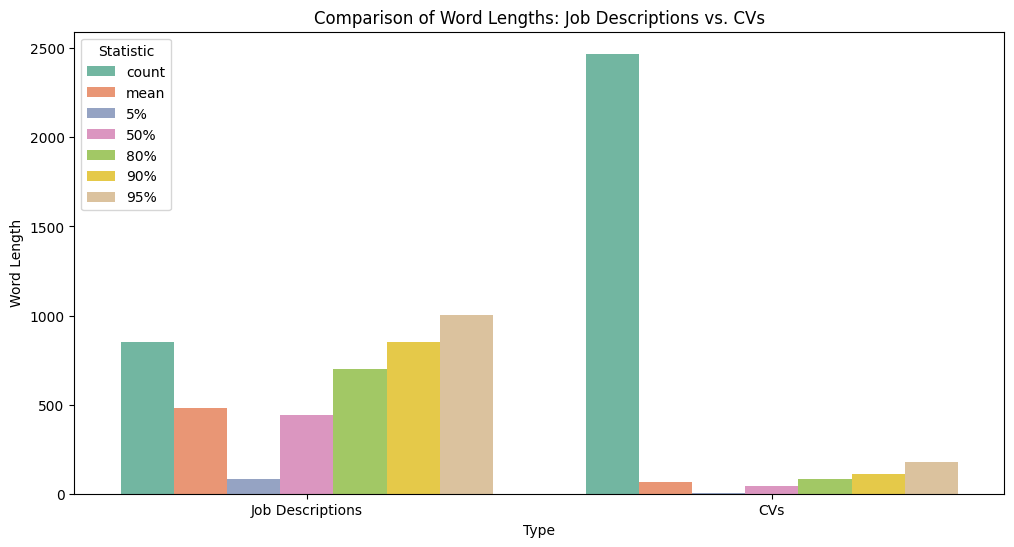

In [30]:
# Create a box plot to compare word lengths
plt.figure(figsize=(12, 6))
sns.barplot(data=comparison_df, x='Type', y='Value', hue='Statistic', palette='Set2')


plt.title('Comparison of Word Lengths: Job Descriptions vs. CVs')
plt.xlabel('Type')
plt.ylabel('Word Length')
plt.legend(title='Statistic', loc='upper left')
plt.xticks(rotation=0)
plt.show();